# 项目：调查数据集（TMDb电影数据）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 数据集選擇“电影数据库”（TMDb，The Movie Database），該包含 1 万条电影信息，其中包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列。


> 探索内容：

    *票房收入最高值及該電影信息
    *影響票房收入的相關因素
    *票房收入和知名度
    *票房收入和電影時長
    *票房收入和電影評分
    *票房收入和電影預算
    *電影的發展特點

> 問題： 

    *近年來電影票房收入呈現什麽趨勢？
    *票房收入最高的電影是哪一部？其票房值為多少？
    *電影呈現什麽樣的發展趨勢呢？
     票房收入，知名度，電影時長，電影評分
    *決定票房收入的相關因素有什麽呢？
    

In [1]:
#导入语句。
import pandas as pd
import csv
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

### 常规属性

In [2]:
# 加载数据，評估數據
# 类型，以及是否有缺失数据或错误数据的情况。
date_file = 'tmdb-movies.csv'
df = pd.read_csv(date_file)

In [3]:
#行， 列
df.shape

(10866, 21)

In [4]:
#檢查數據
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
# INFO
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 数据清理（清理重複，丟失的數據行）
    *删除一條重复的數據。
    *根據表頭的列，imdb_id是唯一可以檢索數據的標識。10865條信息中有10條缺失，雖然其他列耶存在缺失信息，但是都與探索數據無關，所以只删除这些imdb_id缺失的记录即可。
    *保存到新的文件夾

In [6]:
#檢查類型 & 重複 & 空值
print(type(df['release_date'][0]))
print(df.duplicated().sum())
print(df.isnull().sum())

<class 'str'>
1
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [7]:
#去除重複行
df.drop_duplicates(inplace=True)

In [8]:
#確認檢查
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [9]:
sorted(df['release_year'].unique())

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [10]:
#根據imdb_id索引，清除無法索引的數據
df.dropna(subset=['imdb_id'],inplace=True)

In [11]:
#保存到新的文件夾
df.to_csv('imdb-movies.csv',index=False)

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1（影響票房收收入的相關因素有什麽？ ）
    
    *近年來電影票房收入呈現什麽趨勢？
    *票房收入最高的電影是哪一部？其票房值為多少？
    *影響票房收收入的相關因素有什麽？

In [12]:
#讀取數據，檢查
imdb_df = pd.read_csv('imdb-movies.csv')
imdb_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


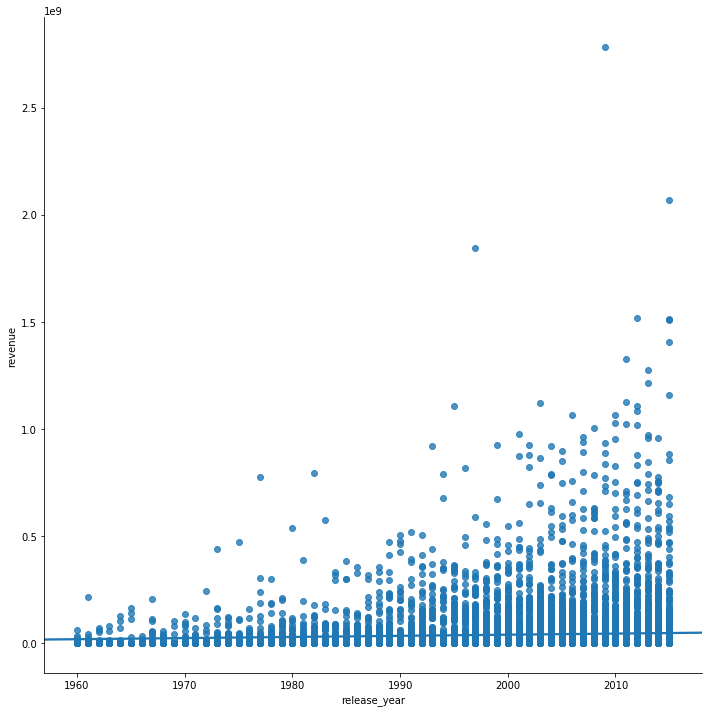

In [13]:
#建立散點圖觀察近年來票房收入的變化
sns.lmplot(x="release_year", y="revenue", data=imdb_df,size=10);

  電影票房收入成上升趨勢,越來越多的電影可以獲得高額的票房收入，可以說電影發展良好。

  從上面的圖中可以注意到有一部票房最高的電影，那麽它的票房收入是多少呢？這部電影是什麽呢？

In [14]:
#探索電影票房收入最高值
top = imdb_df['revenue'].max()
print(top)

2781505847


In [15]:
#查找最高票房電影信息
imdb_df.query('revenue == @top')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1384,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


 
  這部票房收入最高的電影是“Avatar”，以上為其詳細信息。
  那麽近年來影響電影票房收入的相關因素有什麽呢？首先把數據按發行年份進行分組，求出均值，獲得新的數據集，再進行分析。

In [16]:
#將電影信息根據'release_year'（發行年份）分組，然後得出 mean（）
#建立新數據集
#檢查
df_new1 = imdb_df.groupby('release_year').mean()
df_new1.head(3)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.28125,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.00000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.06250,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07


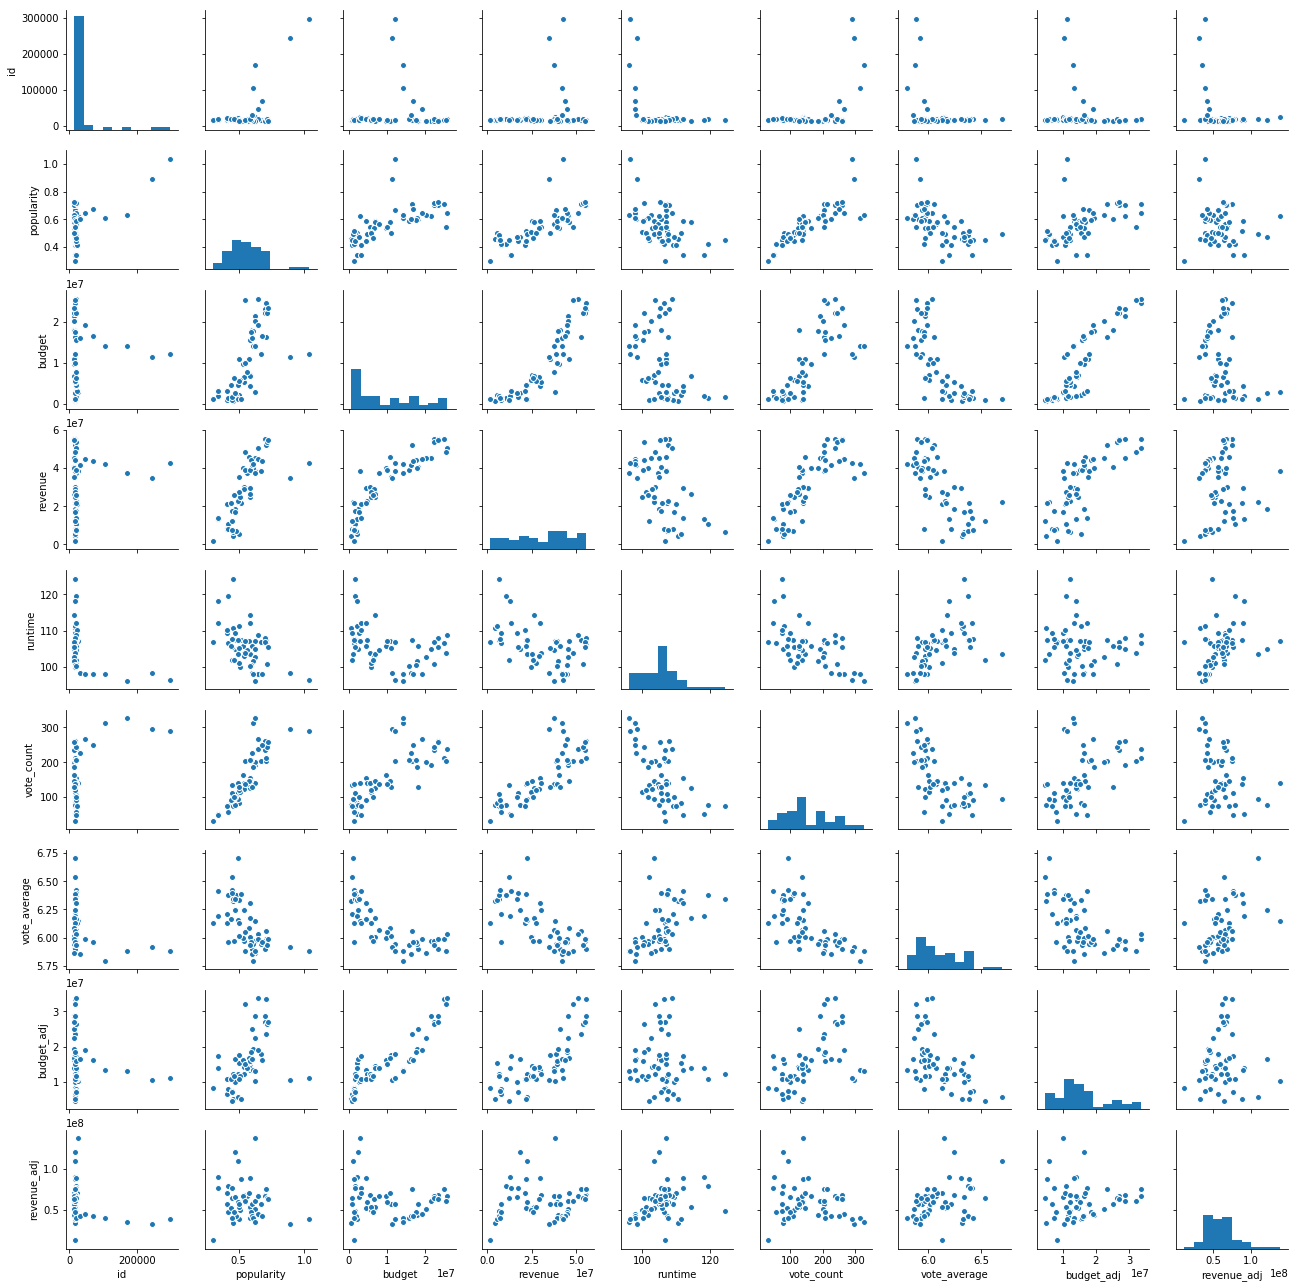

In [18]:
#散點圖探索影響票房收入的相關因素
sns.pairplot(df_new1,size=2);

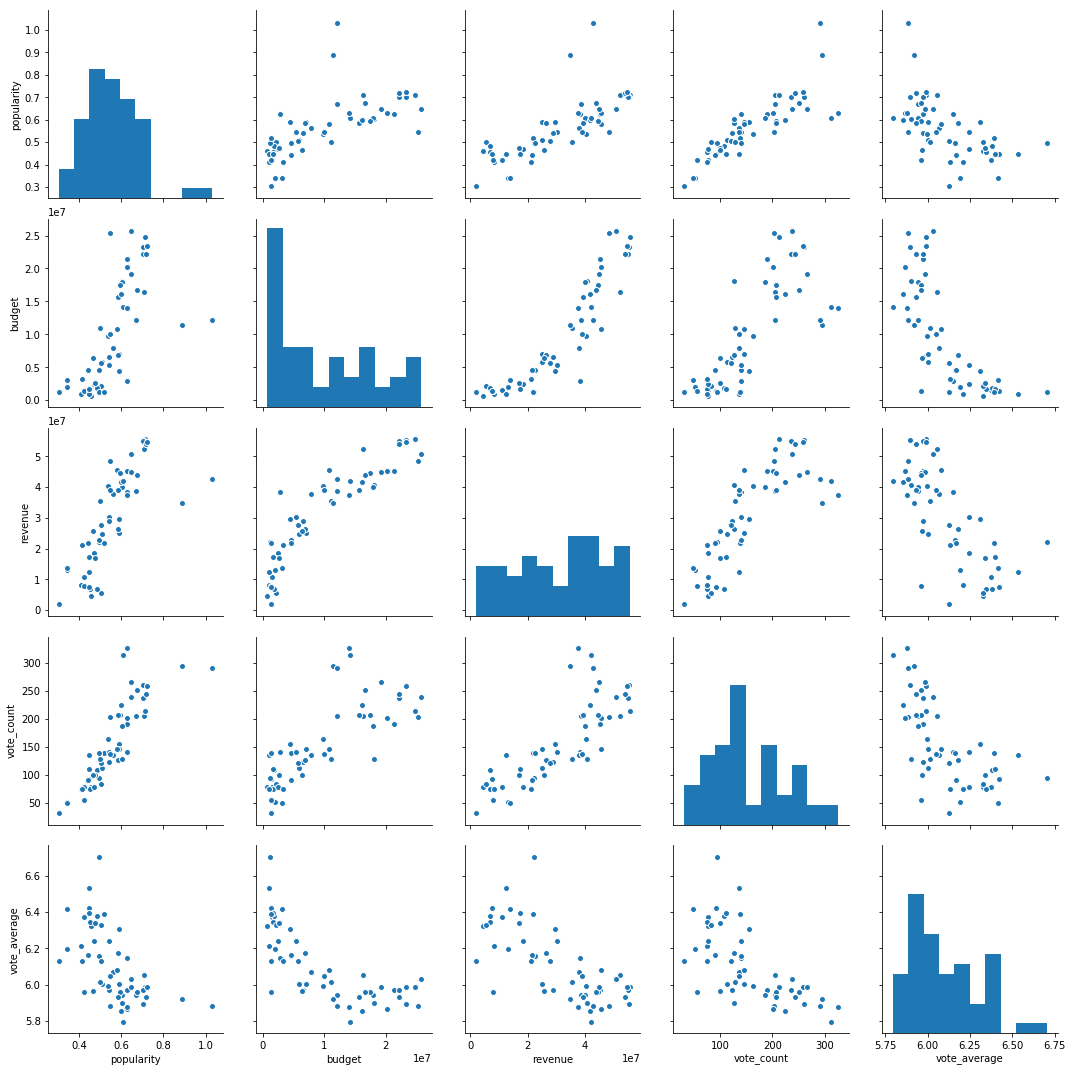

In [19]:
#發現相關項目放大圖觀察
sns.pairplot(df_new1,vars=["popularity", "budget","revenue","vote_count","vote_average"],size=3);

根據散點圖与票房收入的相關性便顯而易見了，得出以下相關項目：
    
    *知名度与票房收入成正比。但是存在少数异常值，該電影的知名度非常高，但是票房收入却在中等水平，還需進一步的调查數據的準確性。
    
    *電影的製作預算與票房收入成正比。也存在個別異常值，比如製作成本很低，但是票房收入處於中高等水平。
    
    *投票数与票房收入大致成正比。这个因素中同樣，我们观察到一些電影獲得相對较高的投票數却没有相应的高票房收入。也許，還要仔细审查投票方式和票数，或者其他影响投票的因素，如電影的類型、演员阵容、導演等，甚至考慮電影簡介是否也會影響投票結果。
    
    *投票平均数与票房收入成反比。
    *考慮到投票數的情况，我们可以推断投票变量对票房收入的影响。这需要进行更加详细的分析来评估异常值，并對根据投票数和投票平均数进行详细的分析。
    
    

### 研究问题 2（近年來電影的發展有什麽特點呢？）

利用研究問題1中根據電影發行年份分組並取得均值的數據，建立相關直方圖可以看出樣本的典型屬性。
然後在單獨對個別樣本數據進行分析，得出結論。

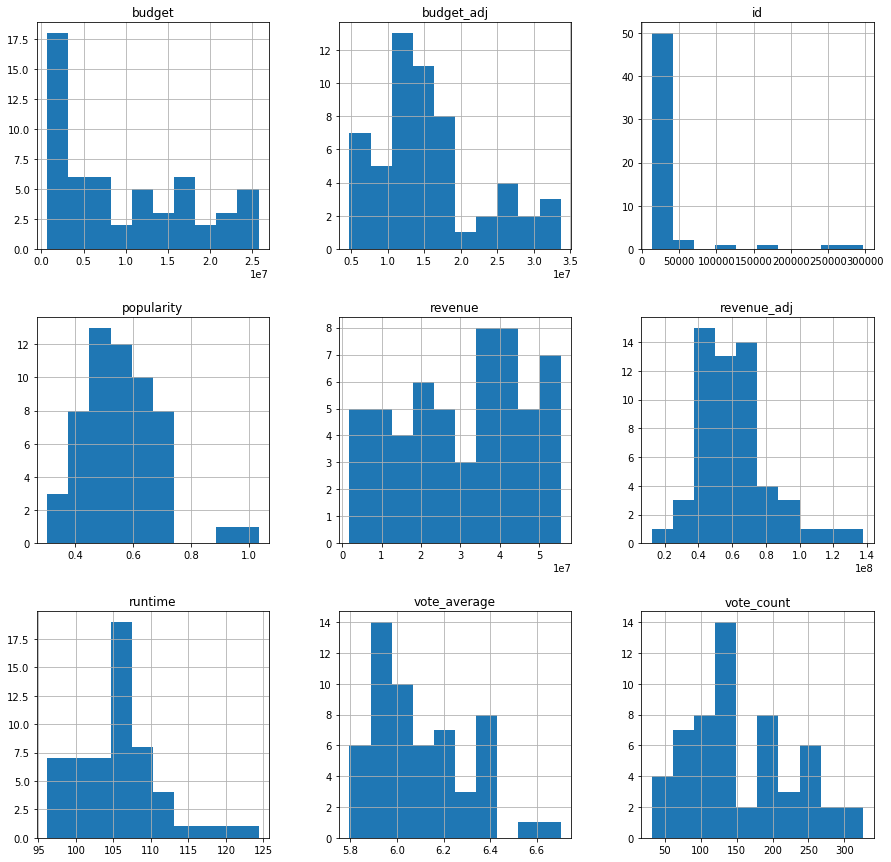

In [20]:
#建立直方圖觀察樣本的典型屬性
df_new1.hist(figsize=(15,15));

通過該直方圖，決定選擇電影票房收入，知名度，電影時長以及製作預算來進行進一步分析。

首先，我们延續探究問題1中的電影票房收入，近年來一部電影大約可以獲得多少收入呢？通過下面這個直方圖來觀察數據集的收入情況。分佈最集中的地方便放映出票房收入的典型特點。

In [21]:
df_new1['revenue'].describe()

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


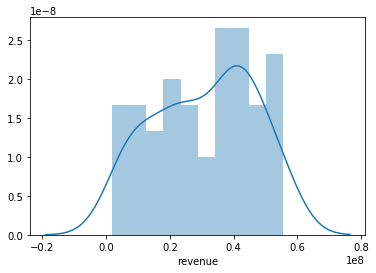

In [22]:
sns.distplot(df_new1['revenue'],bins=10);


    *票房收入的差别相對較大。
    *其次通過數據和直方圖可以確定收入是呈左偏分佈的。
    *收入的大多数樣本分佈在3.7e+07 到4.8e+07的范围之内。

然後想知道近年來一部电影的普及度是怎樣的，因此通過直方圖來觀察數據集中普及度的樣本的特點。同樣最高值可以顯示普及度的典型特點。

In [23]:
df_new1['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


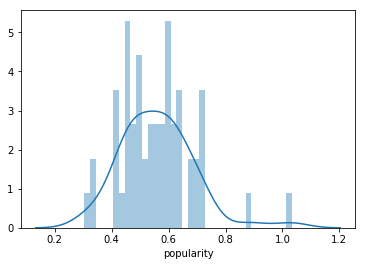

In [24]:
sns.distplot(df_new1['popularity'],bins=36);


    *普及度的直方圖是呈右偏分佈的特點。
    *從直方圖和四分位數百分比可以得出，大多數樣本分佈在0.45到0.63的範圍之内。
    *但是一些區域沒有分佈任何數據比如在0.35-0.4，0.65-0.66，0.72-0.86，0.88-1.01的區間之内，還要進一步的檢查數據樣本。

然後想瞭解近年來的電影時長有怎樣的特點，用同樣的方式來觀察分析。

In [29]:
df_new1['runtime'].describe()

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


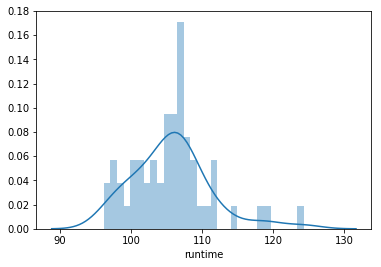

In [30]:
sns.distplot(df_new1['runtime'],bins=30);


    *數據集的分佈呈現右偏分佈的。
    *通過圖像可以看出大部分的樣本分佈在105-108分鐘之間。
    *最大值在105-107分鐘的區間内。

最後來看製作預算的樣本趨勢有什麽特點呢？

In [27]:
df_new1['budget'].describe()

count    5.600000e+01
mean     9.833150e+06
std      8.023062e+06
min      6.892796e+05
25%      2.426431e+06
50%      6.906936e+06
75%      1.645743e+07
max      2.573766e+07
Name: budget, dtype: float64

c:\users\19156\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


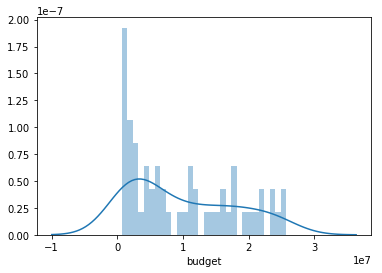

In [28]:
sns.distplot(df_new1['budget'],bins=30);

    *直方圖呈右偏分佈。
    *預算的多數樣本分佈在0.69e+06到1.64e+07的區間之内。
    *最大值分佈在0.69e+06-1.62e+07的區間之内。
   

<a id='conclusions'></a>
## 结论

> 局限性：
    1. 首先票房收入的數值單位并沒有統一，各國電影的收入可能分別用美元，歐元，法郎等計數，該問題在探究過程中被忽略了。
    2. 只把電影票房收入作爲電影市場的收益來源有局限性，比如還有DVD,周邊產品等等考慮進入，所以僅用票房收入太單一，還需探究更多樣本數據。
    3. 關於普及度，該項的來源和評價水平不夠明確，在數據分析時存在單一性和偏見性
    4. 對於一些有缺失的項目。不得不承認和假設成立，對結果的準確性還是很局限。
       
> 結論：
    1. 通過以上數據分析發現了近年來影響票房收入的相關因素，及相關性。
    2. 近年來電影的發展，時長，製作預算，普及度，票房收入的特點和趨勢。
    3. 關於電影時長，注意到最受觀衆喜歡的時長是105—107分鐘的區間内，這對將來的電影製作會有很大的幫助。
    4. 電影的票房收入顯示出存在很寬汎的範圍内，但是大約可以得出是3.7e+07 到4.8e+07的區間内，這對電影製作和估計票房收入有很重要的參考意義。
    5. 通過比較可以看出投票数和票房收入呈正相關，而投票平均数与收入呈負相關。普及度對票房收入的影響更爲直觀。
    6. 這些數據只可以看出相關性，數據的來源和可利用性還需進一步探討。


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295